In [1]:
'''
author: rohit sharma
created on: 03/08/2021
'''
# ANN (Artificial Neural Network)

# Part-1  - Data Preprocessing

#import necessary libraries
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
#read data
data = pd.read_csv(r"C:\Users\ROHIT\Desktop\Churn_Modelling.csv")
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [5]:
#divide the data
X = data.iloc[:, 3:13]
y = data.iloc[:, 13]

In [6]:
#independent features
X

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10
...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77
9997,709,France,Female,36,7,0.00,1,0,1,42085.58
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52


In [7]:
#dependent feature
y

0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: Exited, Length: 10000, dtype: int64

In [8]:
#convert catagorical features into dummy features
#create dummy variables
geography = pd.get_dummies(X["Geography"],drop_first=True)
gender = pd.get_dummies(X["Gender"],drop_first=True)

In [9]:
#concate the data frames
X = pd.concat([X, geography, gender], axis=1)

In [10]:
X

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain,Male
0,619,France,Female,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0,0,1
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0,0,1
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,0,0,0
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1,0,1


In [11]:
#drop un-necessary columns
X = X.drop(['Geography', 'Gender'], axis=1)

In [12]:
X

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain,Male
0,619,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0,0,1
9996,516,35,10,57369.61,1,1,1,101699.77,0,0,1
9997,709,36,7,0.00,1,0,1,42085.58,0,0,0
9998,772,42,3,75075.31,2,1,0,92888.52,1,0,1


In [14]:
#splitting the dataset into the training and testing set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [15]:
#feature scaling for scale down all the features into the same scale range so that it take less time to execute
#because of this gradient decent convergence will happen quickely
from sklearn.preprocessing import StandardScaler

In [16]:
sc = StandardScaler()

In [17]:
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [18]:
X_train

array([[ 0.16958176, -0.46460796,  0.00666099, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-2.30455945,  0.30102557, -1.37744033, ...,  1.75486502,
        -0.57369368,  0.91601335],
       [-1.19119591, -0.94312892, -1.031415  , ..., -0.5698444 ,
        -0.57369368, -1.09168714],
       ...,
       [ 0.9015152 , -0.36890377,  0.00666099, ..., -0.5698444 ,
        -0.57369368,  0.91601335],
       [-0.62420521, -0.08179119,  1.39076231, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-0.28401079,  0.87525072, -1.37744033, ...,  1.75486502,
        -0.57369368, -1.09168714]])

In [19]:
X_test

array([[-0.55204276, -0.36890377,  1.04473698, ...,  1.75486502,
        -0.57369368, -1.09168714],
       [-1.31490297,  0.10961719, -1.031415  , ..., -0.5698444 ,
        -0.57369368, -1.09168714],
       [ 0.57162971,  0.30102557,  1.04473698, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       ...,
       [-0.74791227, -0.27319958, -1.37744033, ..., -0.5698444 ,
         1.74309049,  0.91601335],
       [-0.00566991, -0.46460796, -0.33936434, ...,  1.75486502,
        -0.57369368,  0.91601335],
       [-0.79945688, -0.84742473,  1.04473698, ...,  1.75486502,
        -0.57369368,  0.91601335]])

In [21]:
#Part - 2 Make ANN Model

#import the keras library and packages
import keras
from keras.models import Sequential # it is responsible for creating a neural network
from keras.layers import Dense  #for creating hidden layers
from keras.layers import LeakyReLU, PReLU, ELU #activation functions
from keras.layers import Dropout #whenever neural network is quit deep then we will use dropout

In [22]:
#initialising the ANN
classifier = Sequential()

In [25]:
#adding the input layer and first hidden layer
classifier.add(Dense(units = 6, kernel_initializer = 'he_uniform', activation='relu', input_dim = 11))
#classifier.add(Dropout(0.3))

In [26]:
#adding the second hidden layer
classifier.add(Dense(units = 6, kernel_initializer = 'he_uniform', activation='relu'))
#classifier.add(Dropout(0.4))

In [27]:
#adding the output layer
classifier.add(Dense(units = 1, kernel_initializer = 'glorot_uniform', activation='sigmoid'))
#classifier.add(Dropout(0.2))

In [30]:
#compiling the ANN
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
classifier.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 6)                 72        
_________________________________________________________________
dense_1 (Dense)              (None, 6)                 42        
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 7         
Total params: 121
Trainable params: 121
Non-trainable params: 0
_________________________________________________________________


In [33]:
# fitting the ANN to the training set
model_history = classifier.fit(X_train, y_train, validation_split = 0.33, batch_size = 10, epochs = 100)
#batch_size - to reduce the computational power
#validation_split - so that we can test the data on test dataset seperately

Epoch 1/100
536/536 [==============================] - 16s 3ms/step - loss: 0.6423 - accuracy: 0.6361 - val_loss: 0.5060 - val_accuracy: 0.7948
Epoch 2/100
536/536 [==============================] - 1s 1ms/step - loss: 0.4815 - accuracy: 0.8010 - val_loss: 0.4737 - val_accuracy: 0.7955
Epoch 3/100
536/536 [==============================] - 1s 2ms/step - loss: 0.4670 - accuracy: 0.7948 - val_loss: 0.4553 - val_accuracy: 0.7955
Epoch 4/100
536/536 [==============================] - 1s 1ms/step - loss: 0.4472 - accuracy: 0.7980 - val_loss: 0.4435 - val_accuracy: 0.7989
Epoch 5/100
536/536 [==============================] - 1s 1ms/step - loss: 0.4283 - accuracy: 0.8036 - val_loss: 0.4353 - val_accuracy: 0.8058
Epoch 6/100
536/536 [==============================] - 1s 1ms/step - loss: 0.4320 - accuracy: 0.8059 - val_loss: 0.4280 - val_accuracy: 0.8092
Epoch 7/100
536/536 [==============================] - 1s 2ms/step - loss: 0.4117 - accuracy: 0.8121 - val_loss: 0.4200 - val_accuracy: 0.811

536/536 [==============================] - 1s 2ms/step - loss: 0.3362 - accuracy: 0.8604 - val_loss: 0.3505 - val_accuracy: 0.8569
Epoch 55/100
536/536 [==============================] - 1s 2ms/step - loss: 0.3218 - accuracy: 0.8709 - val_loss: 0.3519 - val_accuracy: 0.8550
Epoch 56/100
536/536 [==============================] - 1s 2ms/step - loss: 0.3207 - accuracy: 0.8704 - val_loss: 0.3518 - val_accuracy: 0.8550
Epoch 57/100
536/536 [==============================] - 1s 2ms/step - loss: 0.3338 - accuracy: 0.8595 - val_loss: 0.3520 - val_accuracy: 0.8584
Epoch 58/100
536/536 [==============================] - 1s 2ms/step - loss: 0.3292 - accuracy: 0.8614 - val_loss: 0.3510 - val_accuracy: 0.8573
Epoch 59/100
536/536 [==============================] - ETA: 0s - loss: 0.3398 - accuracy: 0.8602 ETA: 0s - loss: 0.3426 - accuracy:  - 1s 1ms/step - loss: 0.3397 - accuracy: 0.8602 - val_loss: 0.3509 - val_accuracy: 0.8538
Epoch 60/100
536/536 [==============================] - 1s 2ms/step -

In [34]:
# list all the data in history
print(model_history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


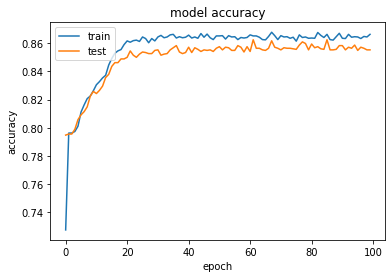

In [36]:
#summarize history for accuracy
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc = 'upper left')
plt.show()

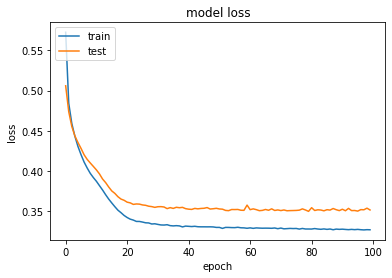

In [37]:
#summarize history for accuracy
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc = 'upper left')
plt.show()

In [38]:
#Part - 3 Making the prediction and evaluating the model

#predicting the test set results
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)

In [39]:
#making the confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

In [40]:
cm

array([[1508,   87],
       [ 196,  209]], dtype=int64)

In [41]:
#calculate the accuracy
from sklearn.metrics import accuracy_score
score = accuracy_score(y_pred, y_test)

In [42]:
score

0.8585